### Visualization of local subgraph

In [4]:
import torch
from attention_analysis_utils import (
    get_attention_raw_dict,
    process_attention_dict,
    get_att_dict_per_layer,
    get_computation_graph,
    get_nodes_per_level_from_comp_graph_full,
    reindex_nodes_per_level,
    translate_comp_graph,
)
from visualization_utils import (
    visualize_computation_graph,
    draw_local_comp_graph_with_ground_truth_path,
)
from torch_geometric.utils import get_num_hops

# device = torch.device("cpu")
# Load the network data locally (for reproduction)
data = torch.load("/workspace/Infection_50003d_sp.pt", map_location="cpu")
# Load model as a whole
model = torch.load("/workspace/GAT_infection_3L1H_sp.pt", map_location="cpu")
model.eval()

GAT_L3_intervention(
  (conv1): GATConv_mask(2, 8, heads=1)
  (conv2): GATConv_mask(8, 8, heads=1)
  (conv3): GATConv_mask(8, 5, heads=1)
)

In [9]:
data

Data(edge_index=[2, 10086], num_nodes=5000, x=[5000, 2], y=[5000], unique_solution_nodes=[974], unique_solution_explanations=[974], num_classes=5, infected=[5000])

In [31]:
idx = 13
data.unique_solution_nodes[idx], data.unique_solution_explanations[idx]

(54, [3660, 4627, 54])

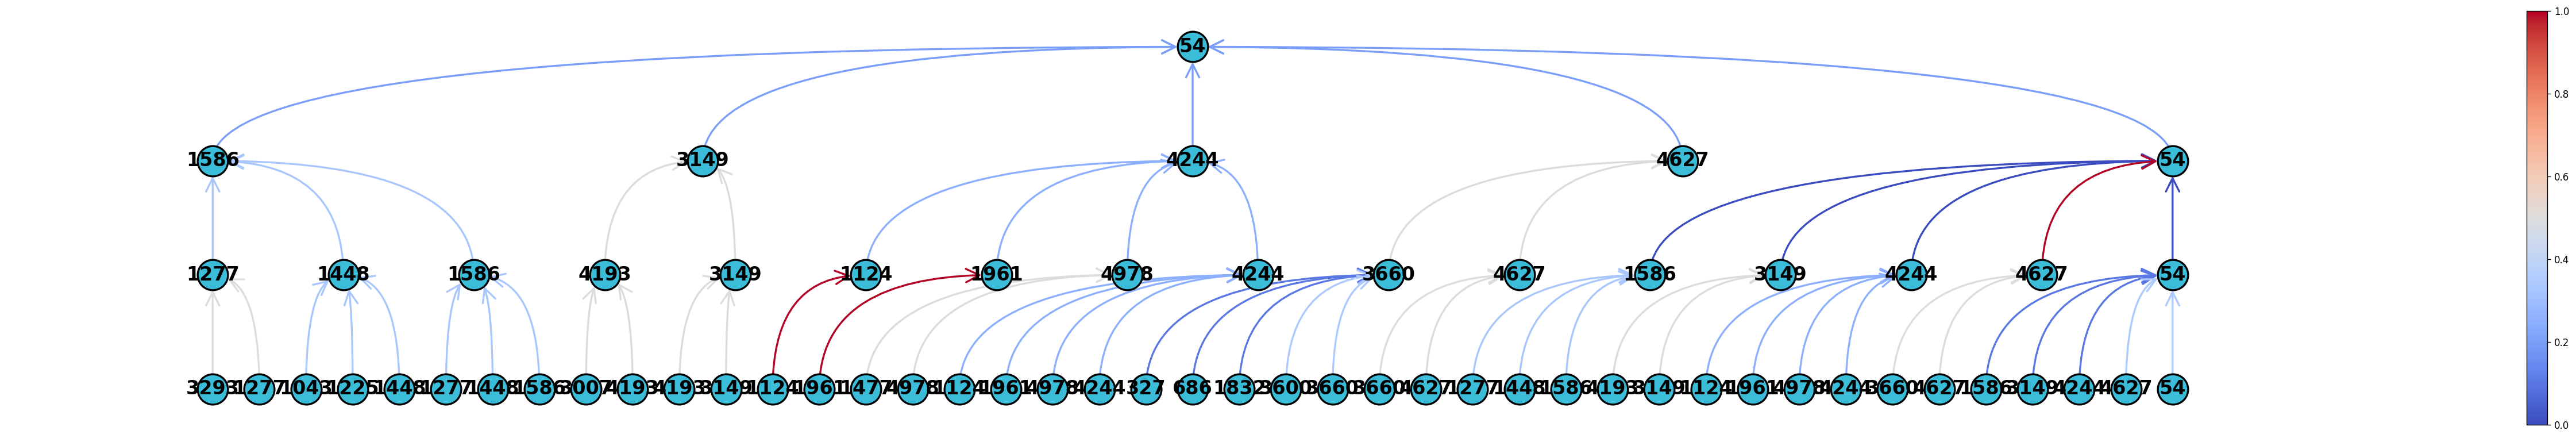

In [32]:
target_idx = data.unique_solution_nodes[idx]
num_layers = get_num_hops(model)

att_dict_raw = get_attention_raw_dict(model, data)
att_dict = process_attention_dict(att_dict_raw)
comp_graph = get_computation_graph(
    edge_index=data.edge_index, k=num_layers, target_idx=target_idx
)
(
    nodes_per_level_original,
    num_nodes_per_level,
    true_node_label,
) = get_nodes_per_level_from_comp_graph_full(comp_graph=comp_graph)
nodes_per_level_new = reindex_nodes_per_level(
    nodes_per_level_original, num_nodes_per_level
)
comp_graph_new = translate_comp_graph(
    comp_graph=comp_graph,
    nodes_per_level_new=nodes_per_level_new,
    nodes_per_level_original=nodes_per_level_original,
)
layer_att_dict = get_att_dict_per_layer(
    comp_graph=comp_graph, comp_graph_new=comp_graph_new, att_dict=att_dict
)
visualize_computation_graph(
    layer_att_dict=layer_att_dict,
    nodes_per_level_new=nodes_per_level_new,
    true_node_label=true_node_label,
    arrowsize=35,
    arrowstyle="->",
)

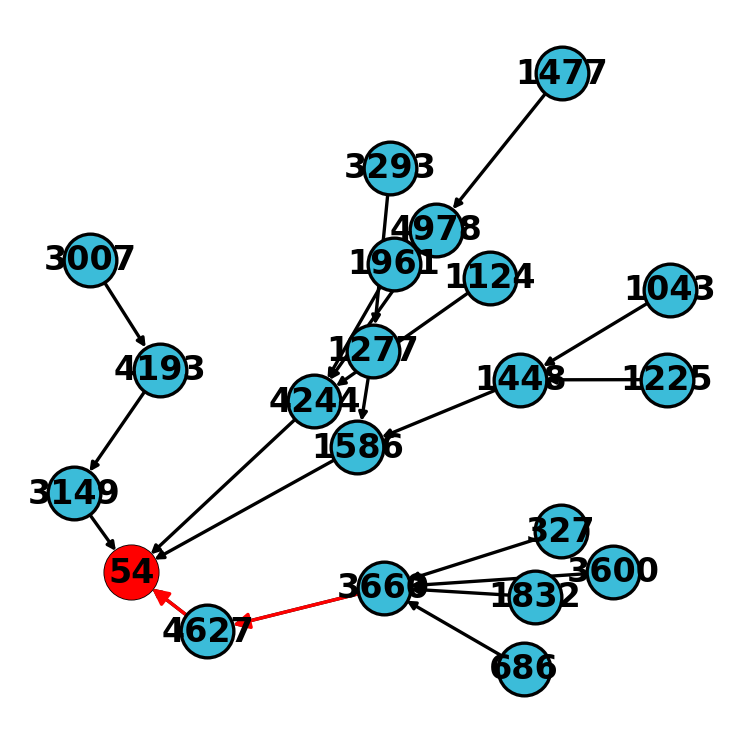

In [33]:
draw_local_comp_graph_with_ground_truth_path(
    data=data, hops=num_layers, target_idx=target_idx, ground_truth=True
)

In [34]:
# device = torch.device("cpu")
# Load the network data locally (for reproduction)
data = torch.load("/workspace/Cora.pt", map_location="cpu")
# Load model as a whole
model = torch.load("/workspace/GAT_Cora_3L1H.pt", map_location="cpu")
model.eval()

GAT_L3_intervention(
  (conv1): GATConv_mask(1433, 64, heads=1)
  (conv2): GATConv_mask(64, 64, heads=1)
  (conv3): GATConv_mask(64, 7, heads=1)
)

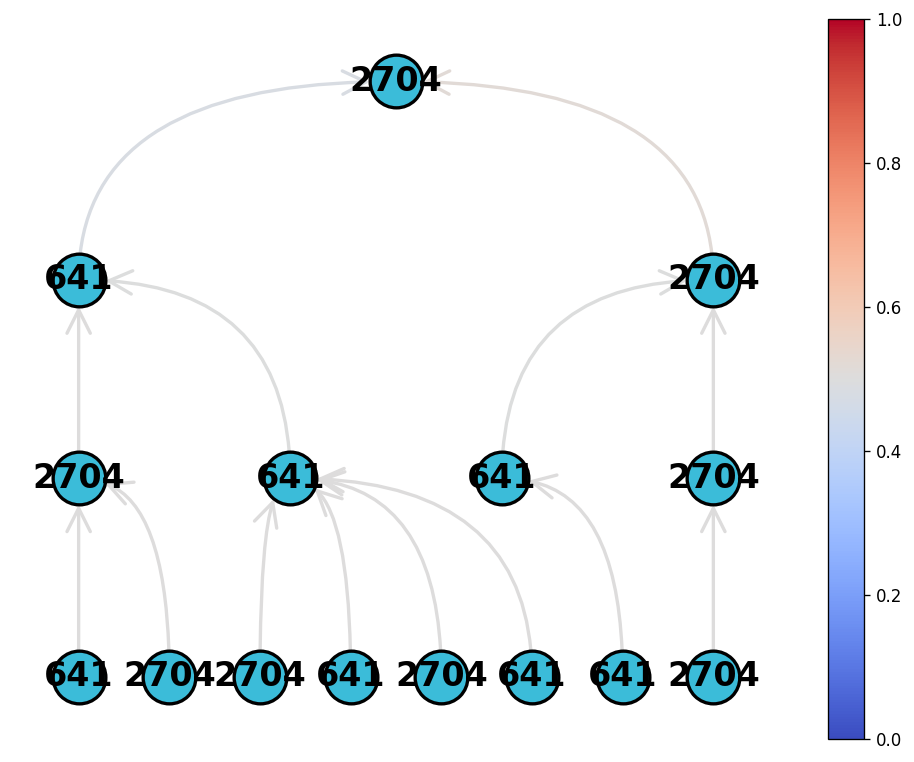

In [49]:
target_idx = 2704
num_layers = get_num_hops(model)

att_dict_raw = get_attention_raw_dict(model, data)
att_dict = process_attention_dict(att_dict_raw)
comp_graph = get_computation_graph(
    edge_index=data.edge_index, k=num_layers, target_idx=target_idx
)
(
    nodes_per_level_original,
    num_nodes_per_level,
    true_node_label,
) = get_nodes_per_level_from_comp_graph_full(comp_graph=comp_graph)
nodes_per_level_new = reindex_nodes_per_level(
    nodes_per_level_original, num_nodes_per_level
)
comp_graph_new = translate_comp_graph(
    comp_graph=comp_graph,
    nodes_per_level_new=nodes_per_level_new,
    nodes_per_level_original=nodes_per_level_original,
)
layer_att_dict = get_att_dict_per_layer(
    comp_graph=comp_graph, comp_graph_new=comp_graph_new, att_dict=att_dict
)
visualize_computation_graph(
    layer_att_dict=layer_att_dict,
    nodes_per_level_new=nodes_per_level_new,
    true_node_label=true_node_label,
    arrowsize=35,
    arrowstyle="->",
)

In [50]:
comp_graph_new

{0: tensor([[1, 2],
         [0, 0]]),
 1: tensor([[3, 4, 5, 6],
         [1, 1, 2, 2]]),
 2: tensor([[ 7,  8,  9, 10, 11, 12, 13, 14],
         [ 3,  3,  4,  4,  4,  4,  5,  6]])}

In [51]:
layer_att_dict

{0: {(1, 0): 0.48099851608276367, (2, 0): 0.5190014839172363},
 1: {(3, 1): 0.5009777545928955,
  (4, 1): 0.4990222752094269,
  (5, 2): 0.4990222752094269,
  (6, 2): 0.5009777545928955},
 2: {(7, 3): 0.5,
  (8, 3): 0.5,
  (9, 4): 0.5,
  (10, 4): 0.5,
  (11, 4): 0.5,
  (12, 4): 0.5,
  (13, 5): 0.5,
  (14, 6): 0.5}}

In [42]:
from torch_geometric.utils import degree

In [48]:
# find node with lowest degree

degree(data.edge_index[1, :]).shape

torch.Size([2708])